In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup as bs
import urllib.request
from datetime import date
import win32com.client

In [2]:
dt = date.today()
url='https://www.litgrid.eu/index.php/generuoti-excel-dokumenta/475?filter[from]=2024-01-01&filter[to]='+str(dt)+'&lines=150'
print(url)
filename='nordpol.xls'
urllib.request.urlretrieve(url, filename)

excel = win32com.client.Dispatch('Excel.Application')
excel.DisplayAlerts = False

in_file = r'C:\Users\Simonas\Documents\_personal_projects\el_kainos\nordpol.xls'
out_file = r'C:\Users\Simonas\Documents\_personal_projects\el_kainos\nordpol2.xls'

wb = excel.Workbooks.Open(in_file)

wb.CheckCompatibility = False
wb.DoNotPromptForConvert = False

wb.SaveAs(out_file, FileFormat=56) #Execution hangs here
wb.Close()
excel.Quit()


https://www.litgrid.eu/index.php/generuoti-excel-dokumenta/475?filter[from]=2024-01-01&filter[to]=2024-10-30&lines=150


HTTPError: HTTP Error 403: Forbidden

In [2]:
url = "https://www.litgrid.eu/index.php/generuoti-excel-dokumenta/475"
params = {
    'filter[from]': '2024-01-01',
    'filter[to]': str(date.today()),
    'lines': 150
}

response = requests.get(url, params=params)
if response.status_code == 200:
    with open('nordpol.xls', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully as 'nordpol.xls'")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully as 'nordpol.xls'


In [3]:
excel = win32com.client.Dispatch('Excel.Application')
excel.DisplayAlerts = False

in_file = r'C:\Users\Simonas\Documents\_personal_projects\el_kainos\nordpol.xls'
out_file = r'C:\Users\Simonas\Documents\_personal_projects\el_kainos\nordpol2.xls'

wb = excel.Workbooks.Open(in_file)

wb.CheckCompatibility = False
wb.DoNotPromptForConvert = False

wb.SaveAs(out_file, FileFormat=56) #Execution hangs here
wb.Close()
excel.Quit()

In [4]:
r = requests.get('https://www.litgrid.eu/index.php/generuoti-excel-dokumenta/475?filter[from]=2024-01-01&filter[to]=2024-06-30&lines=150')
r.status_code

200

In [5]:
df1 = pd.read_excel('nordpol2.xls')
df1

,Unnamed: 0,Unnamed: 1
0,NaN,Nord Pool Lietuva
1,2024-01-01 00:00:00,40.01
2,2024-01-01 01:00:00,38.37
3,2024-01-01 02:00:00,28.46
4,2024-01-01 03:00:00,26.66
...,...,...
9788,2025-02-11 19:00:00,240.06
9789,2025-02-11 20:00:00,240.01
9790,2025-02-11 21:00:00,99.92
9791,2025-02-11 22:00:00,181.59


In [ ]:
#df1.loc[df1['dt']=='2022-10'].mean()

In [6]:
df1.drop(0, inplace=True)

In [7]:
df1.rename(columns={'Unnamed: 0': 'dt', 'Unnamed: 1': 'value'},inplace=True)

In [8]:
df1['value'].max()

1478.91

In [9]:
df1['value']= df1.value.astype('float')
df1['dt'] = pd.to_datetime(df1['dt']).dt.strftime("%Y-%m")

In [10]:
monthly_average = df1.groupby(by=['dt']).mean()
monthly_average.reset_index(inplace=True)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8


In [12]:
sns.set()

In [13]:
x=monthly_average['dt']
y = monthly_average['value']

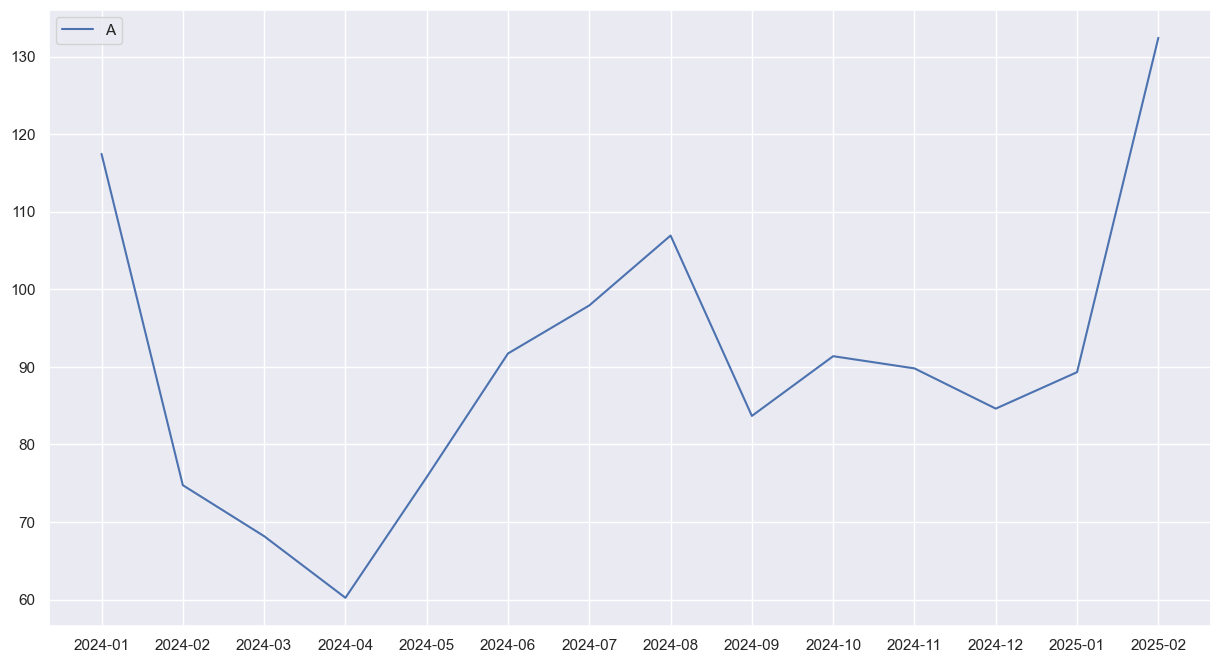

In [14]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
from datetime import datetime

In [ ]:
file = "doctor.jpg"

In [ ]:
def renamed_file(file):
    extention = file.rsplit('.', 1)[1].lower()
    now = datetime.now()
   # print(now)
    timestamp = datetime.timestamp(now)
    
    return str(timestamp).split('.')[0]+'.'+extention

In [ ]:
renamed_file("cat.jpg")

In [ ]:
renamed_file("dog.jpg")